In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "/home/edi/data/data_000637.txt"
N = 1310720
#N = 10_000
data = pd.read_csv(file,nrows=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [3]:
#EX2: FINDING X
x = data.groupby('ORBIT_CNT').max()#['BX_COUNTER']
x

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS
ORBIT_CNT,,,,,
3869200167,1,1,139,3187,28
3869200168,1,1,139,3538,29
3869200169,1,1,139,2766,29
3869200170,1,1,139,3377,29
3869200171,1,1,139,3542,29
...,...,...,...,...,...
3869211167,1,1,139,3553,29
3869211168,1,1,139,3556,29
3869211169,1,1,139,3498,29


In [4]:
count = x['BX_COUNTER'].mean()*25
print('average BX = {:.1f} ns'.format(count))

#EX_3: TOTAL COUNT
tot = x['BX_COUNTER'].sum()*25/1e9
print('Total data taking time = {:.1f} s'.format(tot))

average BX = 82004.5 ns
Total data taking time = 0.9 s


In [5]:
#4: WRITING ABSOLUTE TIME

h = (data['ORBIT_CNT']-data['ORBIT_CNT'][0])*count
m = data['BX_COUNTER']*25
s = data['TDC_MEAS']*25/30

t = pd.Series( s + m + h, name='TIME')
#pd.concat([data,t], axis=1)
data['TIME']=t
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.023970e+08
1310716,1,1,4,3869211171,763,11,9.023970e+08
1310717,1,0,64,3869211171,764,0,9.023970e+08
1310718,1,0,139,3869211171,769,0,9.023971e+08


In [24]:
data['HEAD'] = np.random.randint(0,2,size=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,5.937167e+04
1,0,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,0,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,9.023970e+08
1310716,0,1,4,3869211171,763,11,9.023970e+08
1310717,1,0,64,3869211171,764,0,9.023970e+08
1310718,0,0,139,3869211171,769,0,9.023971e+08


In [34]:
#6: CREATING A NEW DATAFRAME
newdata = data[data['HEAD']==1]
newdata = pd.DataFrame(data=newdata.values, columns=newdata.columns)
newdata

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1.0,0.0,63.0,3.869200e+09,2553.0,28.0,6.384833e+04
1,1.0,0.0,64.0,3.869200e+09,2760.0,25.0,6.902083e+04
2,1.0,0.0,139.0,3.869200e+09,2776.0,0.0,6.940000e+04
3,1.0,0.0,60.0,3.869200e+09,2788.0,7.0,6.970583e+04
4,1.0,1.0,7.0,3.869200e+09,2785.0,4.0,6.962833e+04
...,...,...,...,...,...,...,...
654591,1.0,1.0,36.0,3.869211e+09,427.0,13.0,9.023886e+08
654592,1.0,1.0,35.0,3.869211e+09,429.0,4.0,9.023886e+08
654593,1.0,0.0,64.0,3.869211e+09,758.0,18.0,9.023969e+08
654594,1.0,0.0,64.0,3.869211e+09,764.0,0.0,9.023970e+08


In [42]:
#7: OCCUPANCY PLOT
#pl = data[data['FPGA']>0]
#pl
data[data['TDC_CHANNEL']==1]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
43,0,1,1,3869200168,7,18,8.219454e+04
45,0,1,1,3869200168,13,18,8.234454e+04
65,1,1,1,3869200168,281,24,8.904954e+04
76,1,1,1,3869200168,1328,4,1.152079e+05
78,1,1,1,3869200168,1454,12,1.183645e+05
...,...,...,...,...,...,...,...
1310471,0,1,1,3869211169,1728,28,9.022571e+08
1310528,1,1,1,3869211169,2818,28,9.022844e+08
1310608,0,1,1,3869211170,1533,27,9.023343e+08
1310612,0,1,1,3869211170,1539,29,9.023344e+08


<AxesSubplot:>

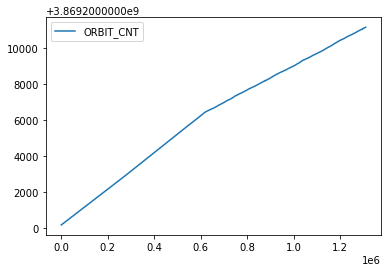

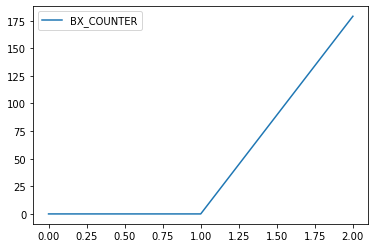

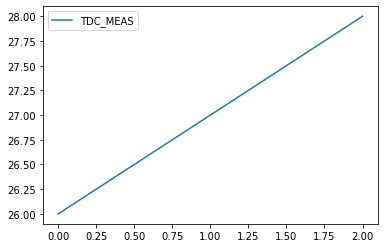

In [7]:


pdf1=pd.DataFrame(data, index=data.index,columns=['ORBIT_CNT'])#, 'BX_COUNTER', 'TDC_MEAS'])
pdf2=pd.DataFrame(data[:3]-2374, index=data.index,columns=['BX_COUNTER'])#, 'TDC_MEAS'])
pdf3=pd.DataFrame(data[:3], index=data.index,columns=['TDC_MEAS'])
#plt.figure(); 
pdf1.plot()
pdf2.plot()
pdf3.plot()
#plt.legend(loc='best')

<AxesSubplot:xlabel='ORBIT_CNT'>

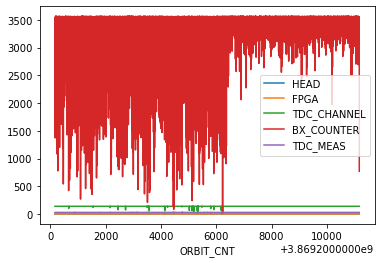

In [8]:
px=pd.DataFrame(x)#, index=data.index,columns=['TDC_MEAS'])
px.plot()

In [9]:
data[100:130]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
100,0,0,62,3869200168,1609,20,122246.202618
101,0,0,60,3869200168,1614,19,122370.369285
102,1,0,61,3869200168,1658,19,123470.369285
103,0,0,62,3869200168,1660,26,123526.202618
104,0,0,63,3869200168,1663,9,123587.035951
105,1,0,7,3869200168,1673,22,123847.869285
106,1,0,139,3869200168,1675,0,123879.535951
107,0,0,63,3869200168,1671,22,123797.869285
108,1,0,10,3869200168,1674,22,123872.869285
109,0,0,64,3869200168,1673,2,123831.202618


In [10]:
print(count/25)

3280.181438051086
